# Proyecto final - Telco Customer Churn
Curso: Fundamentos de aprendizaje de máquina

Grupo 1:


*   Jhair Choco
*   Walter Valverde
*   Miguel Vega

Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data



# Objetivos
El objetivo del proyecto es la elaboración de un modelo de aprendizaje de máquina para la predicción de churn de suscriptores o clientes para una empresa de telecomunicaciones.

Con dicho modelo se podrá predecir si un cliente es propenso a cancelar su suscripción o no y también qué características son las más importantes a la hora de decidir.

A nivel de negocio, el modelo podrá servir para aumentar la retención de clientes a través de campañas o promociones, así como para mejoras a nivel operativo para lograr una mayor satisfacción o experiencia de cliente.

# Inicialización

In [128]:
# Cargar librerías
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Definir opciones generales
pd.set_option('display.max_columns', None)

# Lectura del dataset

In [6]:
# Descargar archivos
!wget -O 'WA_Fn-UseC_-Telco-Customer-Churn.csv' 'https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

--2023-11-12 03:45:50--  https://raw.githubusercontent.com/miguelvg27/ia-pucp-ml-trabajo/main/data/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 970457 (948K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 947.71K  --.-KB/s    in 0.04s   

2023-11-12 03:45:51 (21.9 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [970457/970457]



In [43]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


El dataset cuenta con las siguientes columnas según la documentación:

|Nombre|Descripción|
|---|---|
|CustomerID|Identificador del cliente|
|gender|Género del cliente|
|SeniorCitizen|Indica si el cliente es adulto mayor|
|Partner|Indicas si el cliente tiene una empresa partner|
|Dependantas|Indica si el cliente tiene dependientes|
|tenure|Cantidad de meses de suscripción del cliente|
|PhoneService|Indica si el cliente tiene servicio telefónico|
|MultipleLines|Indica si el cliente tiene varias líneas telefónicas|
|InternetService|Indica el tipo de servicio de internet del cliente|
|OnlineSecurity|Indica si tiene seguridad online en su paquete de internet|
|OnlineBackup|Indica si tiene backups online en su paquete de internet|
|DeviceProtection|Indica si tiene protección de dispositivos en su paquete de internet|
|TechSupport|Indica si tiene soporte técnico en su paquete de internet|
|StreamingTV|Indica si tiene el servicio de streaming tv en su paquete de internet|
|StreamingMovies|Indica si tiene el servicio de streaming de películas en su paquete de internet|
|Contract|Texto|Indica el tipo de contrato del cliente|
|PaperlessBilling|Indica si el clientetiene facturación electrónica|
|PaymentMethod|Método de pago del cliente|
|MonthlyCharges|Cargos mensuales del cliente|
|TotalCharges|Cargos históricos acumulados del cliente|
|Churn|Etiqueta|Indica si el cliente canceló su sucripción|

In [8]:
df.shape

(7043, 21)

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Exporación de datos
Se estudiarán las columnas del archivo y sus características:


*   Nombre
*   Tipo de dato
*   Valores faltantes
*   Utilidad
*   Valores atípicos (para características numéricas)
*   Tipo de distribución (para características numéricas)
*   Correlaciones
*   Posibles transformaciones







## Preprocesamiento de datos
Por conveniencia, se transformarán algunos datos previo a su visualización.

*SeniorCitizen* es una característica categórica. Por el momento la pasaremos a Yes/No como el resto de características categóricas del dataset. De tal manera, no se mezclará con los datos numéricos

In [44]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: 'Yes' if x==1 else ('No' if x==0 else x))
df['SeniorCitizen'].value_counts()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

*TotalCharges* debería ser *float64* y aparece como *object*.

In [45]:
df['TotalCharges'].isna().sum()

0

Convertimos a NaN los vacíos y convertimos a float

In [46]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='raise')
df['TotalCharges'].isna().sum()

11

## Visualización de los datos
A continuación, se visualizarán los datos con el fin de encontrar mayor información de las características



### Datos numéricos

In [102]:
car_num = df.select_dtypes(include=['float64','int64']).columns
car_num

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [47]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


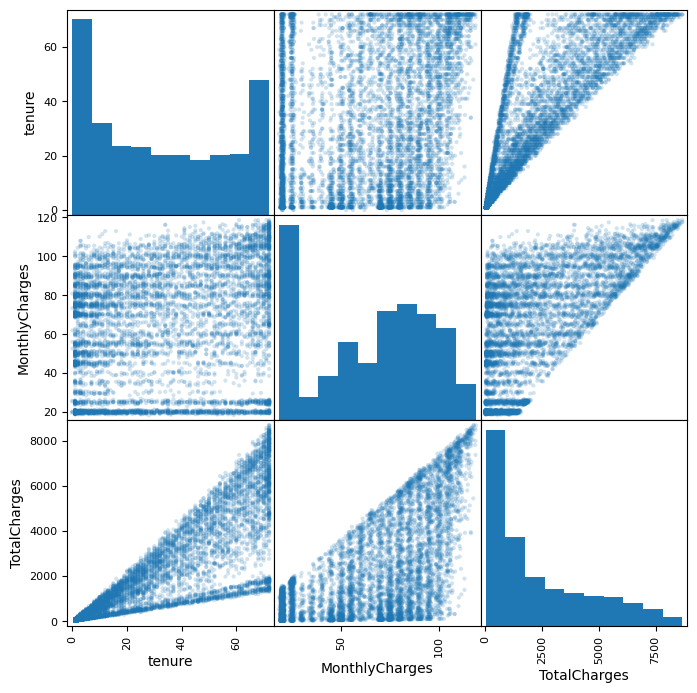

In [83]:
from pandas.plotting import scatter_matrix
fig = scatter_matrix(df, alpha=0.2, figsize=(8, 8), diagonal='hist')

En el gráfico se puede observar que la característica TotalCharges tiene una distribución sesgada.

#### Valores atípicos

Se procede a visualizar la característica TotalCharges

In [60]:
df['TotalCharges'].skew()

0.961642499724251

<Axes: ylabel='Density'>

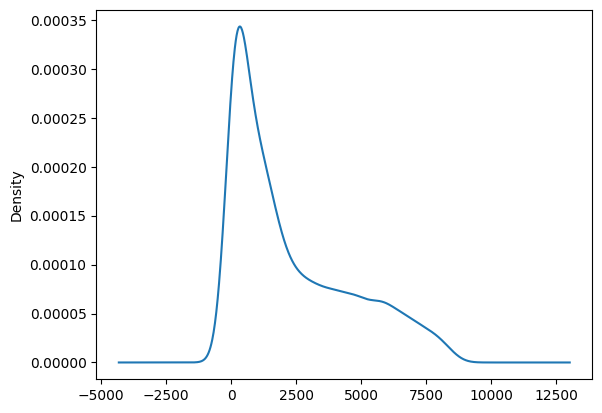

In [63]:
df['TotalCharges'].plot.kde()

<Axes: >

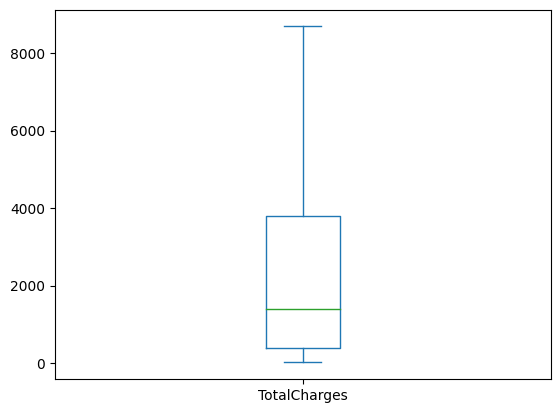

In [61]:
df['TotalCharges'].plot.box()

Para reducir el skew o asímetría y el impacto de los valores atípicos de la cola derecha, se podría aplicar un logaritmo en la ingeniería de características.

#### Correlación

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


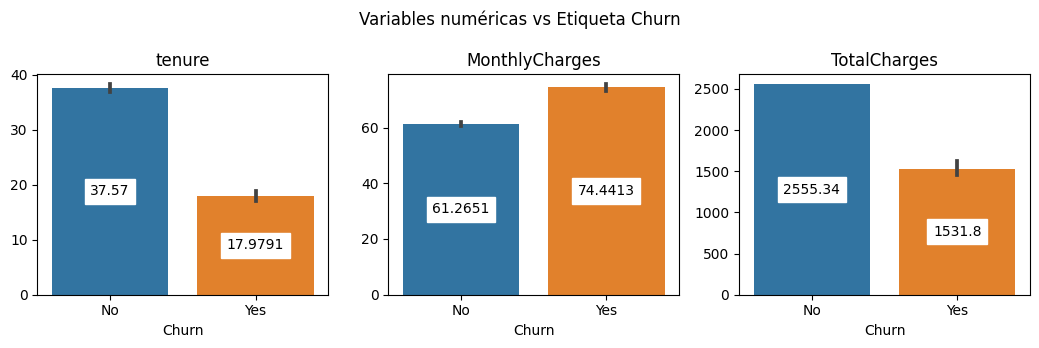

In [149]:
fig, axes = plt.subplots(1, len(car_num), figsize=(len(car_num) * 3.5, 3.5))
fig.suptitle('Variables numéricas vs Etiqueta Churn')
axes = axes.flatten()

for yi in range(0,len(car_num)):
  ax = axes[yi]
  ax.set_title(car_num[yi])
  sns.barplot(data=df, x='Churn', y=car_num[yi], ax=ax, estimator=np.mean)
  ax.bar_label(ax.containers[0], label_type="center", backgroundcolor="w");
  ax.set_ylabel('')

plt.tight_layout()
plt.show()

A continuación, visualizamos la matriz de correlación

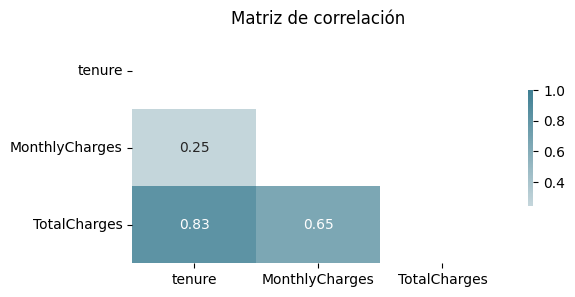

In [79]:
corr = df.corr(numeric_only=True)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(6, 3))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, cbar_kws={"shrink": .5}, annot=True)
plt.title("Matriz de correlación")
fig.show()

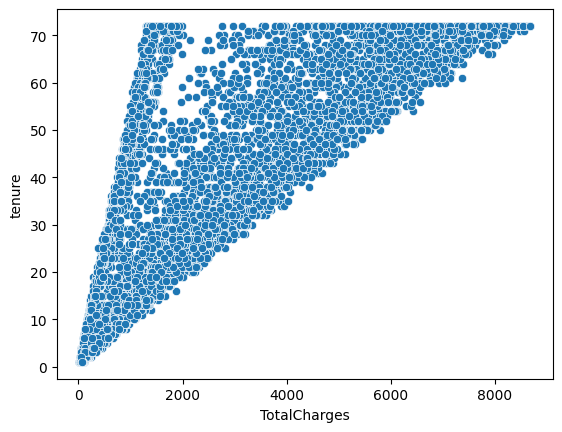

In [95]:
ax = sns.scatterplot(x="TotalCharges", y="tenure", data=df)

La matriz indica que la correlación y entre las característica TotalCharges y tenure es alta, lo cual es lógico, pues entre más tiempo se esté suscrito a un servicio, aumentan los cargos totales. Lo mismo se puede concluir al visualizar el scatterplot. No obstante, no se encuentra necesario unificar ambas características o retirar alguna, pues se consideran ambas variables lo suficientemente importantes y nos pueden dar buenas perspectivas en relación al problema.

### Datos categóricos

In [137]:
car_cat = df.select_dtypes(include=['object']).columns
car_cat = car_cat.drop(["customerID", "Churn"])
len(car_cat)

16

Se grafican las variables categóricas vs la etiqueta churn

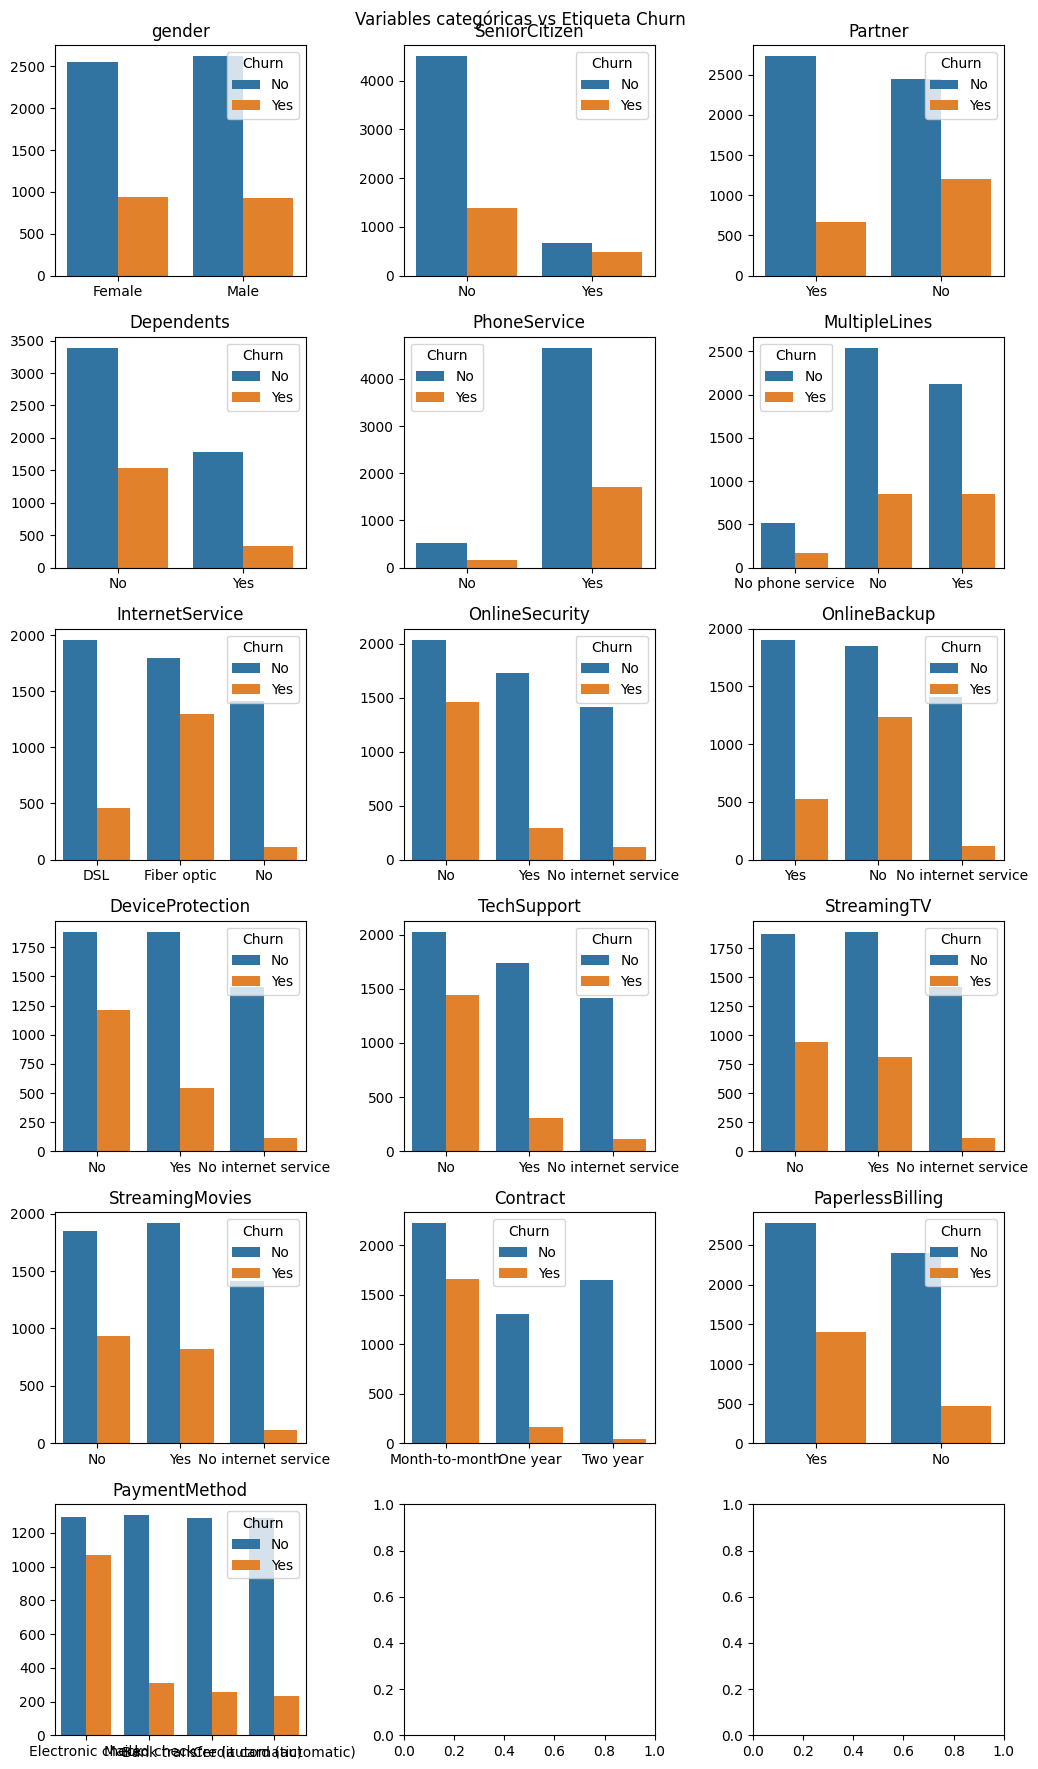

In [150]:
n_columnas = 3
n_filas = math.ceil(len(car_cat)/n_columnas)
fig, axes = plt.subplots(n_filas, n_columnas, figsize=(n_columnas * 3.5, n_filas * 3))
fig.suptitle('Variables categóricas vs Etiqueta Churn')
axes = axes.flatten()

for yi in range(0,len(car_cat)):
  ax = axes[yi]
  ax.set_title(car_cat[yi])
  sns.countplot(data=df, hue='Churn', x=car_cat[yi], ax=ax)
  ax.set_ylabel('')
  ax.set_xlabel('')

plt.tight_layout()
plt.show()

No se visualiza nada fuera de lo normal

### Valores faltantes

In [96]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7032
Churn               7043
dtype: int64

Solo la característica TotalCharges tiene valores faltantes. Visualizaremos los datos faltantes

In [174]:
df[['tenure','TotalCharges','MonthlyCharges']][df['TotalCharges'].isna()]

,tenure,TotalCharges,MonthlyCharges
488,0,NaN,52.55
753,0,NaN,20.25
936,0,NaN,80.85
1082,0,NaN,25.75
1340,0,NaN,56.05
3331,0,NaN,19.85
3826,0,NaN,25.35
4380,0,NaN,20.00
5218,0,NaN,19.70
6670,0,NaN,73.35


Se visualiza que el tenure es 0 para dichas instancias. Por ello, se rellenará el campo TotalCharges con 0, pues son clientes a los que todavía no se les ha facturado su primer pago. Otra opción sería asignarle le valor de MonthlyCharges

In [ ]:
df.select_dtypes("O").nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

## Resumen de los datos
A continuación, se resumen las principales características de las columnas del archivo.

|Nombre|Tipo|Tipo de dato|Rango de valores|Comentarios|
|---|---|---|---|---|
|CustomerID||Texto||Se retirará la característica, pues no da información|
|gender|Binaria|Texto|Male, Female|Se utilizará OrdinalEncoder, pues es binario|
|SeniorCitizen|Binaria|Entero|1=Sí, 0=No|Se utilizará OrdinalEncoder, pues es binario|
|Partner|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|Dependantas|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|tenure|Numérica|Entero|[0-72]|Se usará StandardScaler|
|PhoneService|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|MultipleLines|Categórica|Texto|Yes, No, No phone service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|InternetService|Categórica|Texto|DSL, Fiber optic, No|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|OnlineSecurity|Categórica|Texto|Yes, No, No internet service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|OnlineBackup|Categórica|Texto|Yes, No, No internet service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|DeviceProtection|Categórica|Texto|Yes, No, No internet service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|TechSupport|Categórica|Texto|Yes, No, No internet service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|StreamingTV|Categórica|Texto|Yes, No, No internet service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|StreamingMovies|Categórica|Texto|Yes, No, No internet service|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|Contract|Categórica|Texto|Month-to-month, One year, Two year|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|PaperlessBilling|Binaria|Texto|Yes, No|Se utilizará OrdinalEncoder, pues es binario|
|PaymentMethod|Categórica|Texto|Electronic check, Mailed check, Bank transfer, Credit card|Se utilizará OneHotEncoder, pues tiene más de dos posibles valores|
|MonthlyCharges|Numérico|Real|[18.25,118.75]|Se utilizará StandardScaler|
|TotalCharges|Numérico|Real|[18.8,8684.80]|Se imputarán 0 a los valores faltantes, se aplicará logaritmo para reducir la asimetrías y se utilizará StandarScaler|
|Churn|Etiqueta|Texto|Yes, No|Se retirará la etiqueta para el entrenamiento|


# Preparación de los datos

En esta sección, se procesará el dataset para que quede listo para su entrenamiento.

## Eliminar características

Se retiran las característiacs que no proporcionan información

In [177]:
df_clean = df.drop(columns=['customerID']).copy()

## Imputar valores faltantes

Se imputarán los valores faltantes a TotalCharges

In [182]:
df_clean['TotalCharges'].isna().sum()

0

In [181]:
df_clean['TotalCharges'].fillna(0.0,inplace=True)

In [183]:
df_clean['TotalCharges'].isna().sum()

0

In [184]:
df_clean.describe() # se completa el count

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Ingeniería de características